# Liver Disease Classification 

- This model was developed on a Macbook Pro 13-inch, M1, 2020 laptop with a 16 GB memory, using the macOS Big Sur v11.2.1
- Python v3.8.5 installed via Anaconda
- Pandas v1.1.3
- Scikit Learn v0.24.2
- Used the ILPD (Indian Liver Patient Dataset) found at URL (http://archive.ics.uci.edu/ml/datasets/ILPD+%28Indian+Liver+Patient+Dataset%29)



In [1]:
# import the releavnt libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
# suppressing warning 
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
# to make this notebook's output stable across runs
np.random.seed(42)

In [4]:
# read in the Indian liver patient data file
columns = ['age', 'gender', 'total_bilirubin', 'direct_bilirubin', 'alkphos', 'ALT', 
           'AST', 'total_protein', 'albumin', 'A/G', 'disease']
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/00225/Indian%20Liver%20Patient%20Dataset%20(ILPD).csv", names=columns)
df.head()

,age,gender,total_bilirubin,direct_bilirubin,alkphos,ALT,AST,total_protein,albumin,A/G,disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
# basic descriptive statistics
df.describe(include='all')

,age,gender,total_bilirubin,direct_bilirubin,alkphos,ALT,AST,total_protein,albumin,A/G,disease
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000


The ILPD dataset consists of 583 rows as seen above with 10 feature vectors and one target (disease). 

# Basic data pre-processing

In [6]:
# checking for data types and if there are any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    object 
 2   total_bilirubin   583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   alkphos           583 non-null    int64  
 5   ALT               583 non-null    int64  
 6   AST               583 non-null    int64  
 7   total_protein     583 non-null    float64
 8   albumin           583 non-null    float64
 9   A/G               579 non-null    float64
 10  disease           583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [7]:
# returning rows with the missing data
df[pd.isnull(df['A/G'])]

,age,gender,total_bilirubin,direct_bilirubin,alkphos,ALT,AST,total_protein,albumin,A/G,disease
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


There are only four records that have missing values. All four of which are in the A/G column.

In [8]:
# replacing the missing value with the mean A/G ratio
df['A/G'].fillna(df['A/G'].mean(), inplace=True)

In [9]:
# verifying non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    object 
 2   total_bilirubin   583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   alkphos           583 non-null    int64  
 5   ALT               583 non-null    int64  
 6   AST               583 non-null    int64  
 7   total_protein     583 non-null    float64
 8   albumin           583 non-null    float64
 9   A/G               583 non-null    float64
 10  disease           583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


All of the feature vectors are numeric, except for the gender.

In [10]:
# mapping gender to numerical values
gender_mapping = {'Female': 1,'Male': 2}
df['gender'] = df['gender'].map(gender_mapping)
df.head()

,age,gender,total_bilirubin,direct_bilirubin,alkphos,ALT,AST,total_protein,albumin,A/G,disease
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,2,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,2,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,2,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,2,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [11]:
# mapping the class values so that liver patients remain coded as 1 and non-liver patients are recoded as 0
disease_mapping = {2:0,1:1}
df['disease'] = df['disease'].map(disease_mapping)
df['disease'].value_counts()

1    416
0    167
Name: disease, dtype: int64

# Exploratory data analysis

In [12]:
# relevant counts by disease status and gender
print ('{} people in the study population have liver disease and {} do not'\
       .format(df.loc[df.disease==1, 'disease'].count(), df.loc[df.disease==0, 'disease'].count()))

print ('There are {} men and {} women in the study population'.format(df.loc[df.gender==2, 'gender'].count(),\
                                                                     df.loc[df.gender==1, 'gender'].count()))

print ('{} men and {} women have liver disease'.format(df.loc[(df.disease==1) & \
                    (df.gender==2),'disease'].count(), df.loc[(df.disease==1) & (df.gender==1),'disease'].count()))


416 people in the study population have liver disease and 167 do not
There are 441 men and 142 women in the study population
324 men and 92 women have liver disease


In [13]:
# % prevalence of liver disease in the study sample - check for imbalance
print ('{}% of the study population has liver disease'.format(round(df.loc[df.disease==1, 'disease' ].count()\
                                                                    /df.disease.count()*100,2)))
print ('{}% of the study population do not have liver disease'.format(round(df.loc[df.disease==0, 'disease' ].count() \
                                                                            /df.disease.count()*100,2)))

71.36% of the study population has liver disease
28.64% of the study population do not have liver disease


The data has ~3x patients with liver disease compared to not, making it an unbalanced dataset.

77.88% of the patients with liver disease are men
22.12% of the patients with liver disease are women


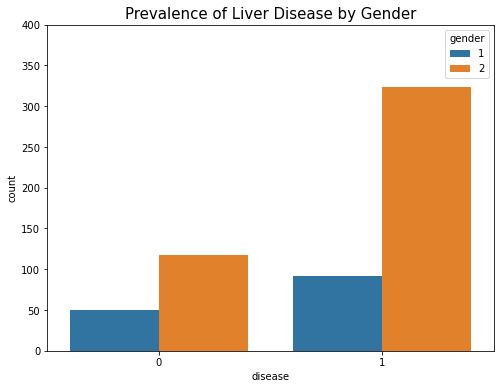

In [14]:
# % prevalence of liver disease by gender
print ('{}% of the patients with liver disease are men'\
       .format(round(df.loc[(df.disease==1) & (df.gender==2), 'disease'].count()/(df['disease']==1).sum()*100,2)))
print ('{}% of the patients with liver disease are women'\
       .format(round(df.loc[(df.disease==1) & (df.gender==1), 'disease'].count()/(df['disease']==1).sum()*100,2)))

fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(x='disease', data=df, hue='gender')
ax.set_ylim(0,400)
plt.title("Prevalence of Liver Disease by Gender", size=15);

- It can be seen that the data had more men than women and also that the prevalence of liver disease was higher amongst men as compared to women.

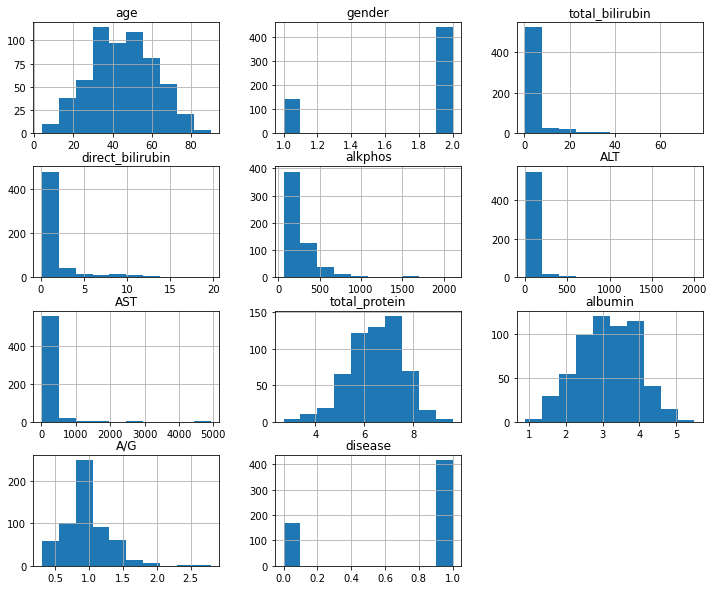

In [15]:
# data visualization - histogram
df.hist(figsize=(12,10))
plt.savefig('Histogram.png', bbox_inches='tight');

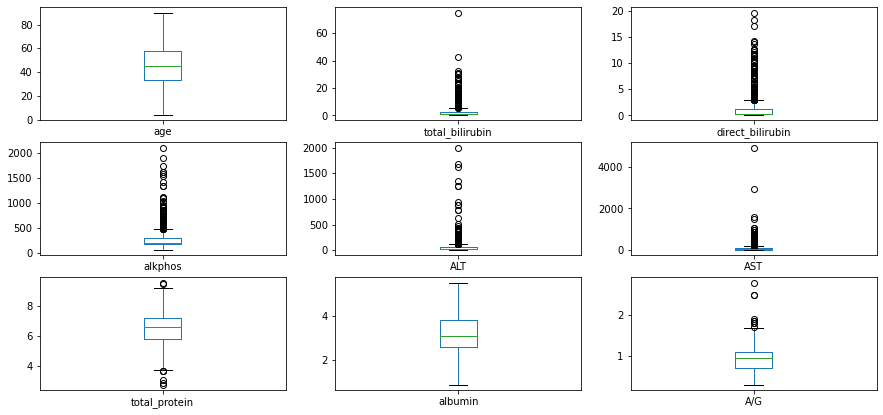

In [16]:
# data visualization - boxplot
df.drop(['disease','gender'], axis=1).plot(kind='box', subplots=True, layout=(5,3), \
                                         sharex=False, sharey=False, figsize=(15,12));
plt.savefig('Boxplot.png', bbox_inches='tight')

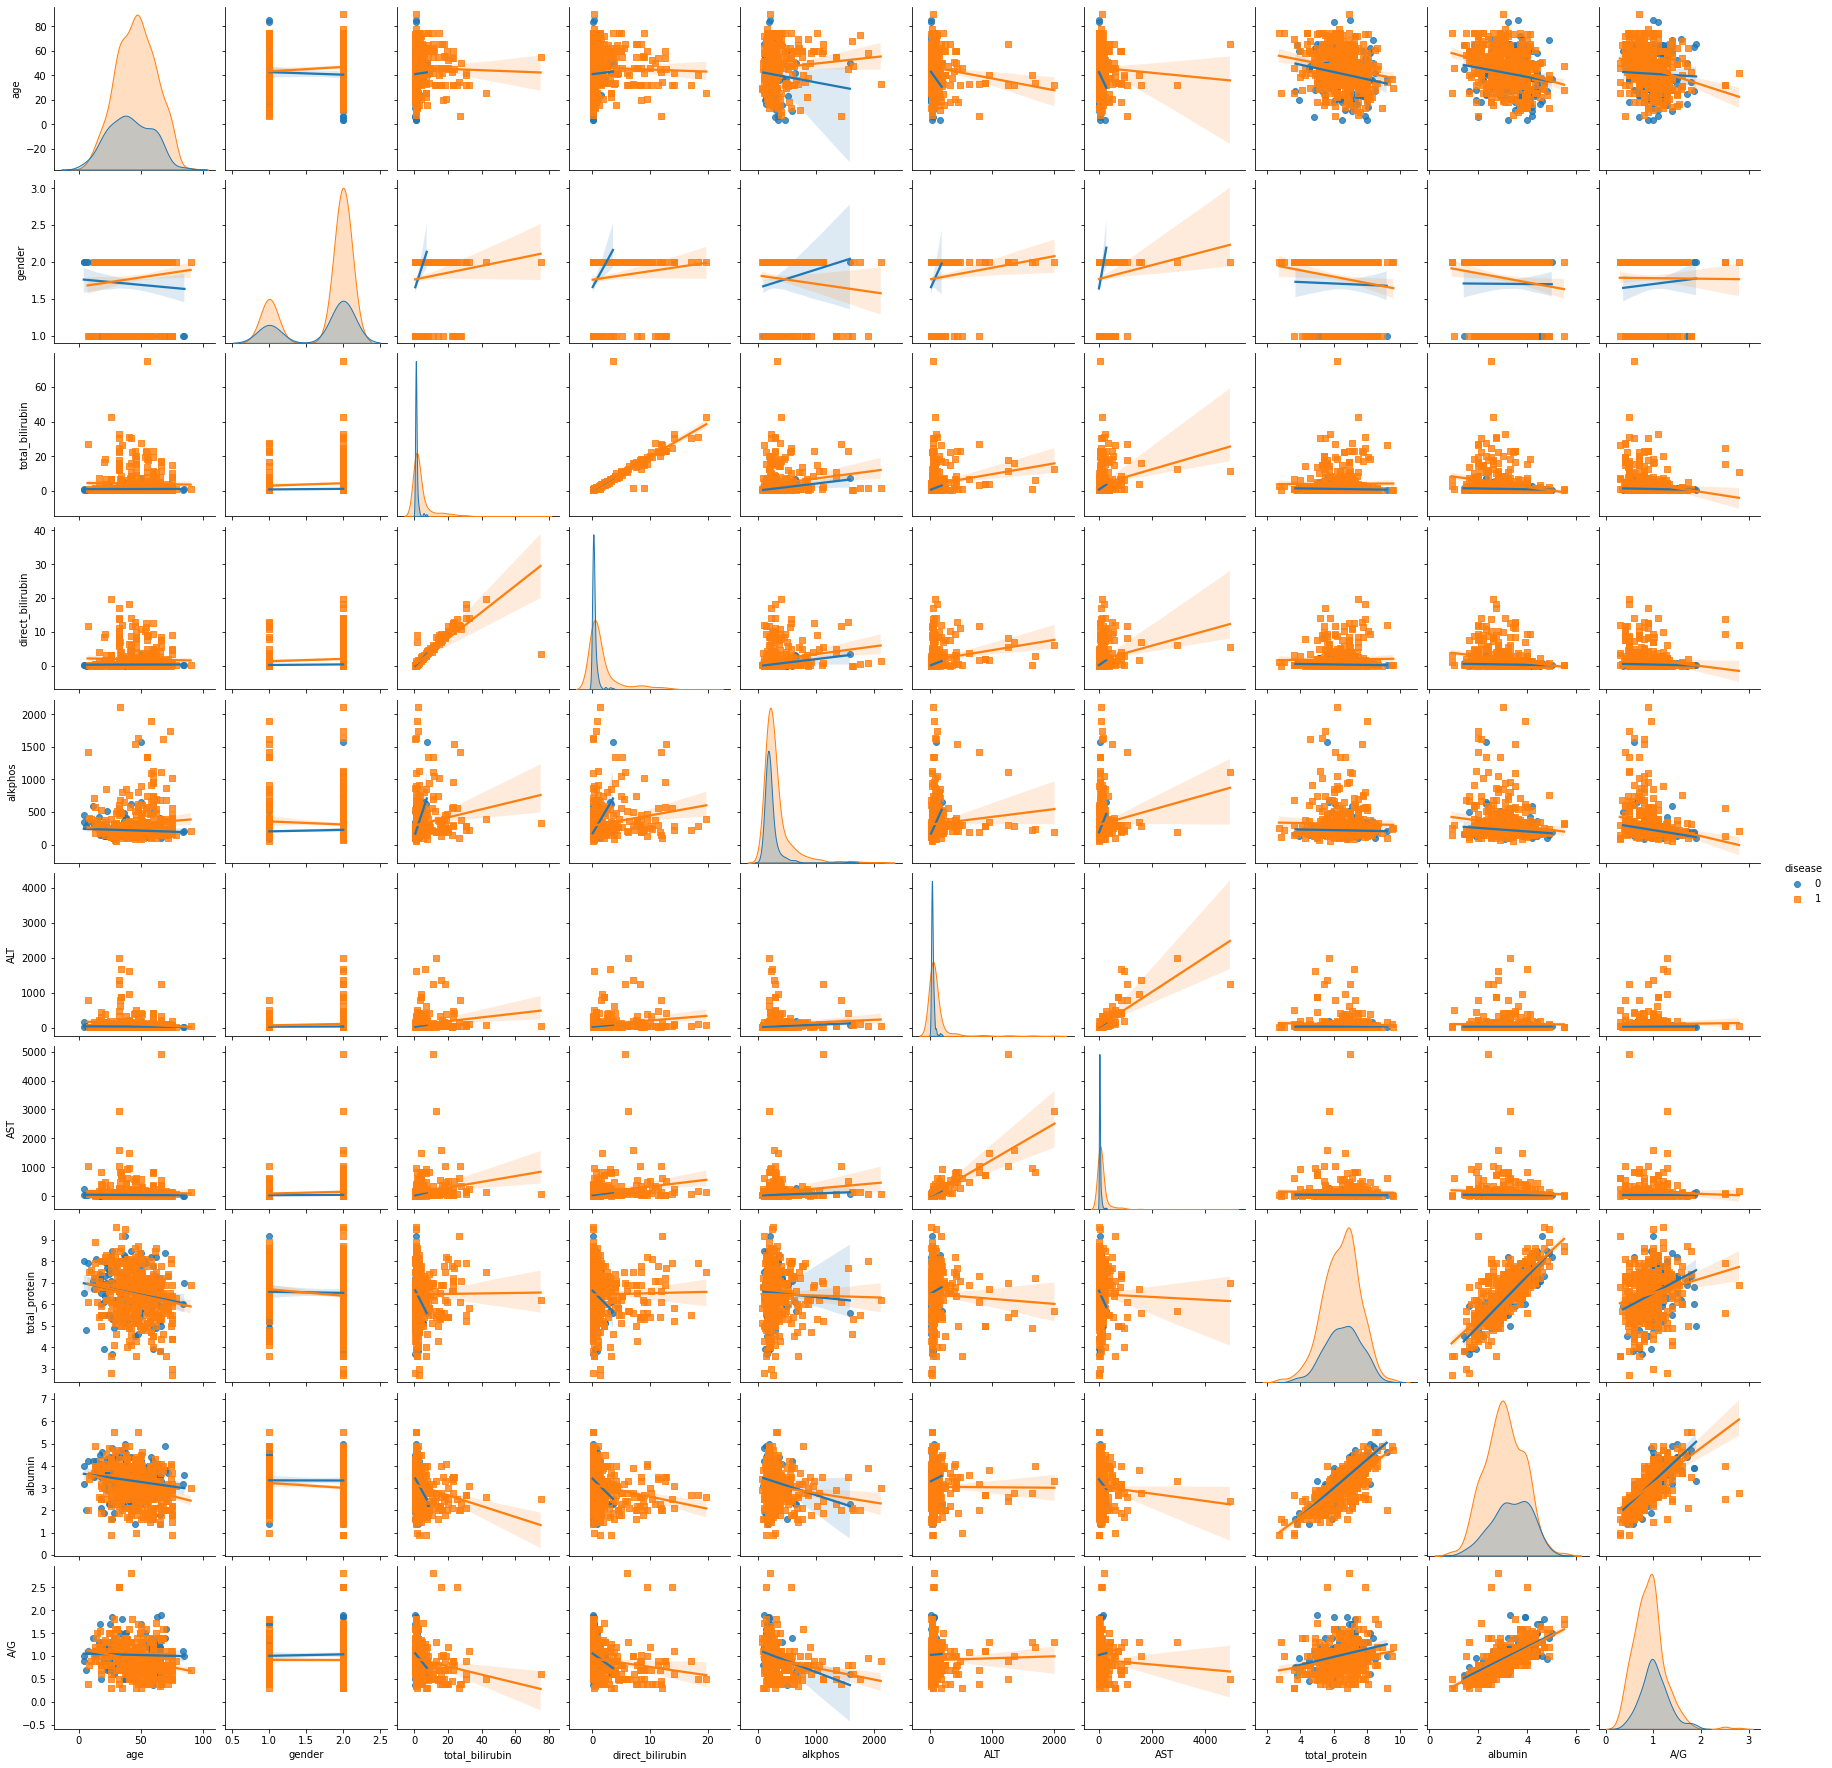

In [17]:
# data visualization - pair plot 
sns.pairplot(df, hue='disease', markers=['o', 's'], kind='reg')
plt.savefig('Pairplot.png', bbox_inches='tight')

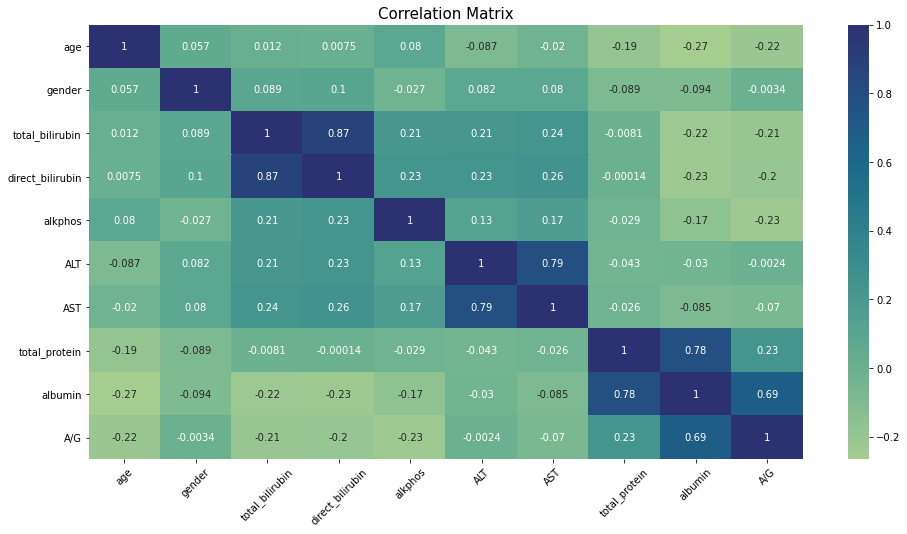

In [54]:
# the correlation between pairs of variables (dropping the class and the non-transformed variables)
corr = df.drop(['disease',], axis=1).corr()
ax = sns.heatmap(corr, annot = True, cmap="crest")

plt.setp(ax.axes.get_xticklabels(), rotation=45)
plt.rcParams['figure.figsize']=(16,8)
plt.title('Correlation Matrix', size=15)
plt.savefig('Correlation_matrix.png', bbox_inches='tight')

It can be noted that there is a strong correlation between

    - total bilirubin and direct bilirubin - direct/conjugated bilirubin and indirect/unconjugated bilirubin together account for total bilirubin
    
    - ALT and AST - liver enzymes that are increased in the presence of liver disease
    
    - Total protein and albumin - total protein accounts for the albumin and globulin together
    
    - Albumin and A/G ratio - normally a 1:1 ratio is expected in serum
    
There are five features that show a non-normal distribution
   - total_bilirubin, direct_bilirubin, alkphos, ALT and AST

## Data transformation

In [19]:
from scipy import stats

In [20]:
# made a copy of the dataset and did a Box-Cox transformation to handle the skewed data identified above
data_norm = df.copy()
data_norm['total_bilrubin_norm'] = stats.boxcox(data_norm['total_bilirubin'])[0]
data_norm['direct_bilrubin_norm'] = stats.boxcox(data_norm['direct_bilirubin'])[0]
data_norm['alkphos_norm'] = stats.boxcox(data_norm['alkphos'])[0]
data_norm['ALT_norm'] = stats.boxcox(data_norm['ALT'])[0]
data_norm['AST_norm'] = stats.boxcox(data_norm['AST'])[0]

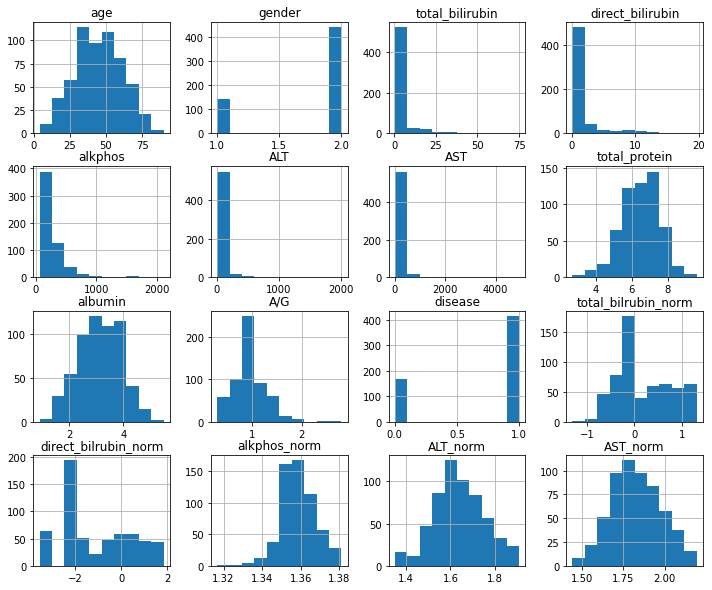

In [21]:
# histogram to visualize the newly created transformed variables
data_norm.hist(figsize=(12,10));

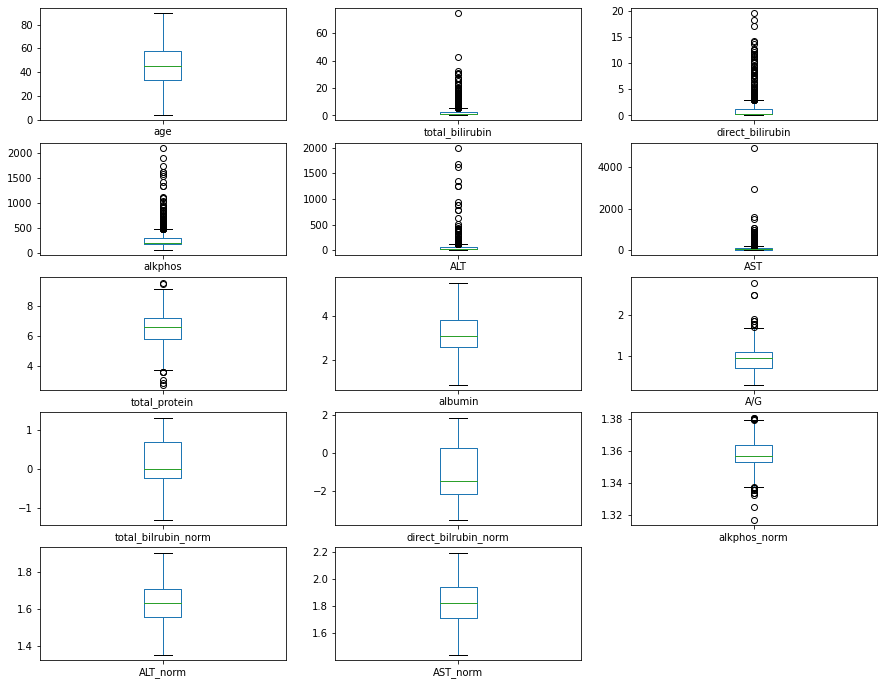

In [22]:
# data visualization - box plot
data_norm.drop(['disease','gender'], axis=1).plot(kind='box', subplots=True, layout=(5,3), \
                                         sharex=False, sharey=False, figsize=(15,12));

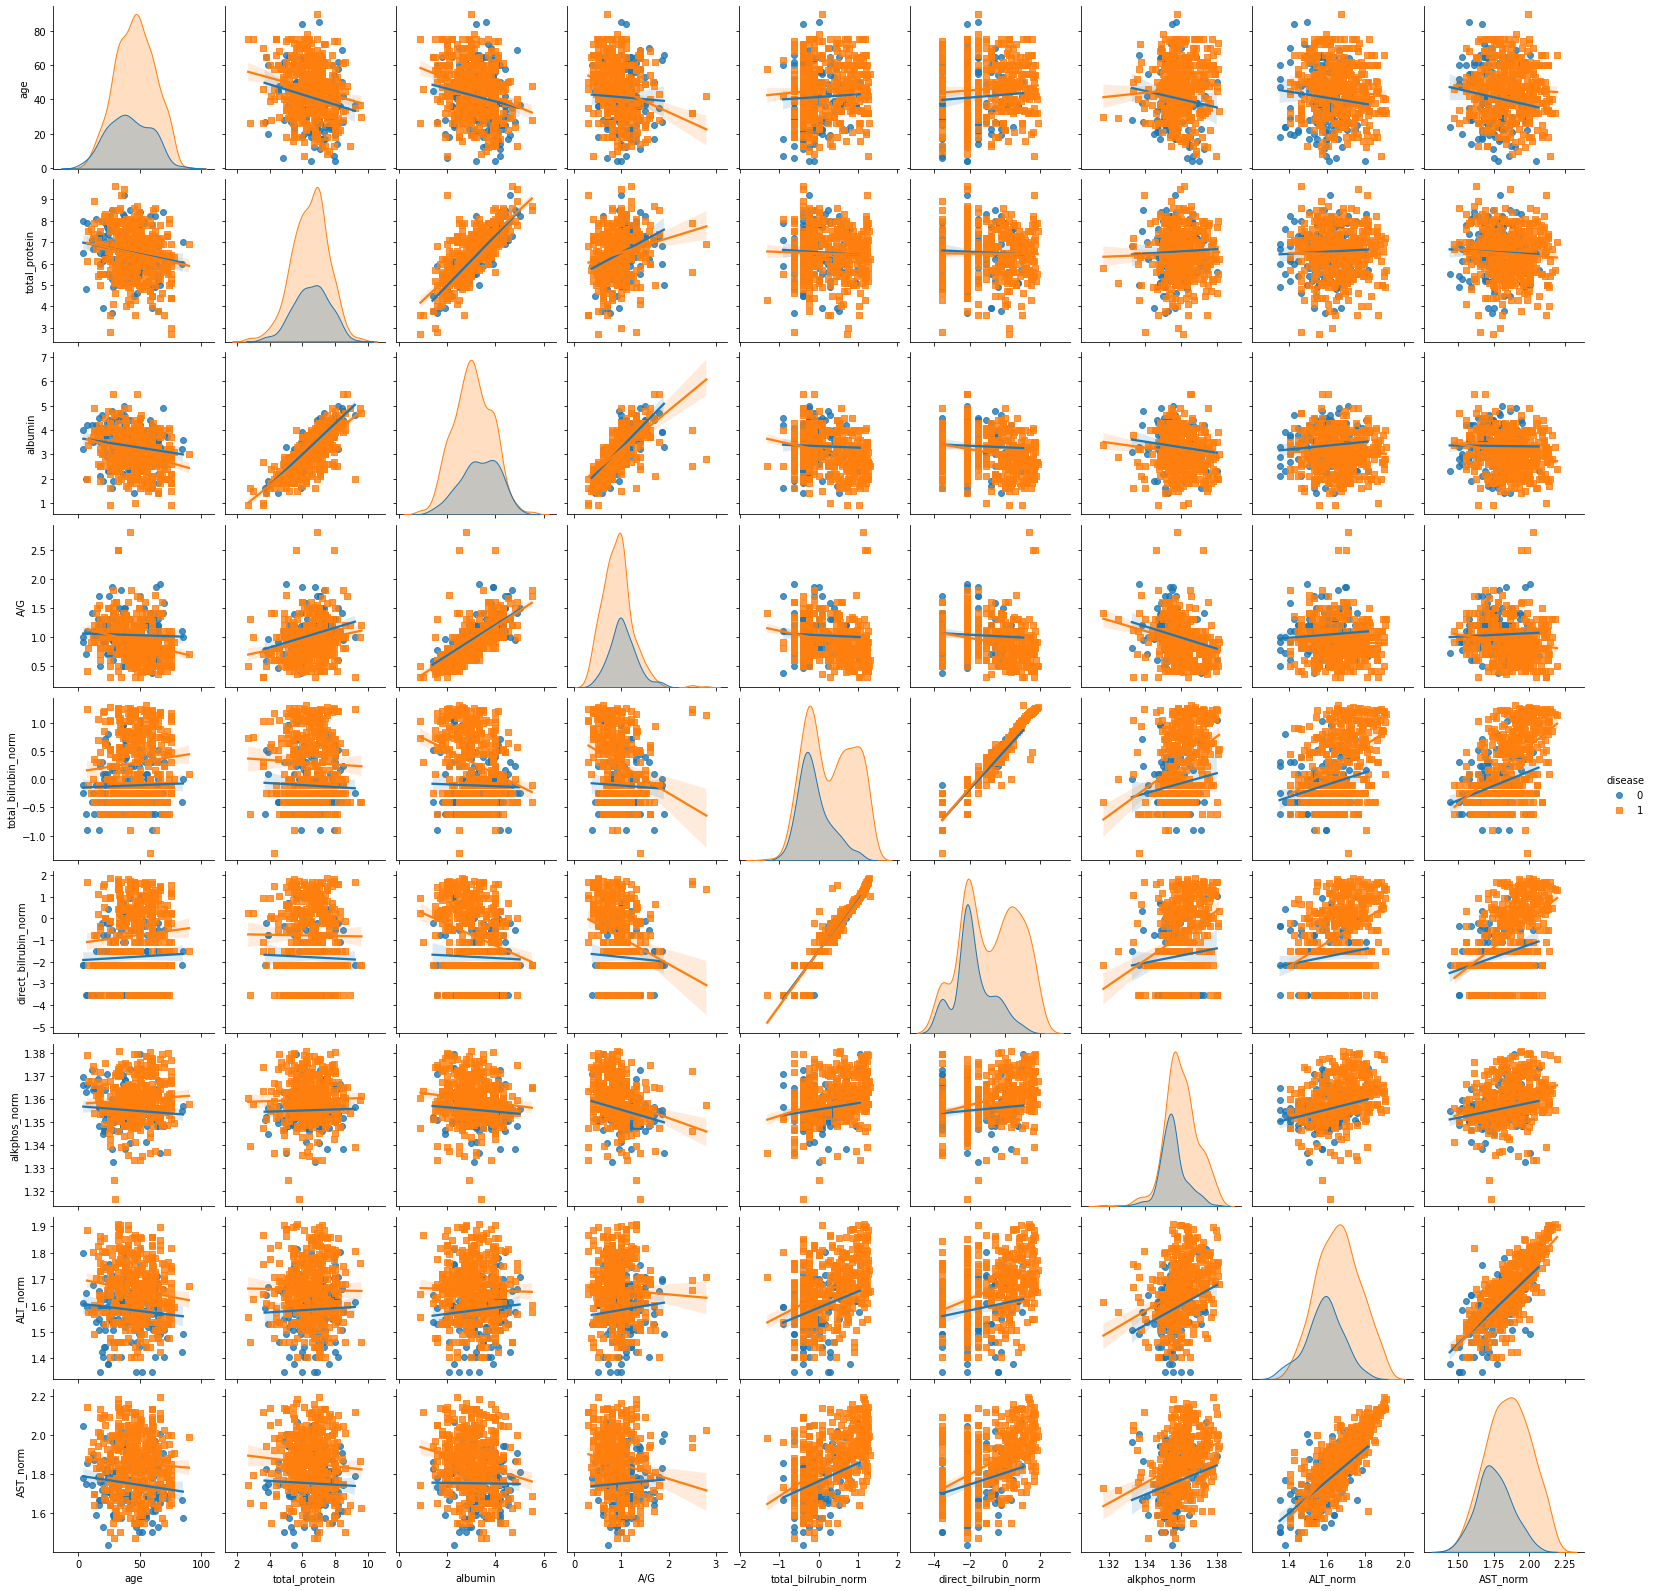

In [23]:
# data visualization - pair plot (dropping the binary and the non-transformed variables)
sns.pairplot(data_norm.drop(['gender', 'total_bilirubin', 'direct_bilirubin', 'alkphos', 'ALT', 'AST'], \
                            axis=1), hue='disease', markers=['o', 's'], kind='reg')

The normalization process, i.e. box-cox transformation, seems to have discretized total and direct bilirubin for smaller values of both variables.

There is a positive relationship between proteins and most liver enzymes. 

## Building the training and testing data

The above analysis has shown that the Box-Cox transform is necessary to handle skewed data distributions. However, these transformations need to be undone before predicting. An alternative is to include the transformation as part of the model training step. This can be done using Scikit-Learn's PowerTransformer class, which handles both the box-cox as well as standarisation of the data. Therefore, the models were trained on the original dataset without transformation and the PowerTransformer class was used within the model pipeline.

In [25]:
# generating feature and target variables for the models
X = df.drop('disease',1).values
y = df.disease.values

# splitting the data to a 80/20 training/testing set
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print ('X_train dimensions: ', X_train.shape)
print ('y_train dimensions: ', y_train.shape)
print ('X_test dimensions: ', X_test.shape)
print ('y_test dimensions: ', y_test.shape)

X_train dimensions:  (466, 10)
y_train dimensions:  (466,)
X_test dimensions:  (117, 10)
y_test dimensions:  (117,)


## Training and visualizing using k-NN Classifier 

In [26]:
# importing relevant libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, \
f1_score, roc_auc_score, plot_roc_curve, classification_report, confusion_matrix, plot_confusion_matrix

In [27]:
# combining PowerTransformer, PCA and kNN in a single pipeline
# since there are a few highly correlated features, PCA will be used for dimensionality reduction
# PCA is used despite the small sample size, but will not be restricted to a small number of components
pipe_knn = Pipeline([
            ('pt', PowerTransformer(method='box-cox')),
            ('pca', PCA()), 
            ('knn', KNeighborsClassifier())])

# the parameter grid for kNN pipeline with the specific chosen hyperparameters to be optimized 
param_grid = {
    'pca__n_components': range(2, 10), #keeping the range large since the sample size is quite small
    'knn__n_neighbors': range(3, 51, 2),
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

To optimize the model, Scikit learns GridSearchCV has been chosen. This method uses the parameter list provided above to build a grid of points where the model is evaluated using cross validation, and the optimal model is the one with the chosen highest scoring metric.

In [28]:
# grid search on accuracy
pipe_knn_acc = GridSearchCV(estimator=pipe_knn, 
                  param_grid=param_grid, 
                  scoring=make_scorer(accuracy_score), 
                  refit=True,
                  cv=10,
                  n_jobs=-1)

# fitting the training model
pipe_knn_acc.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % pipe_knn_acc.best_score_)
print(pipe_knn_acc.best_params_)

# generating the predicted output using the above model
y_pred_knn_acc = pipe_knn_acc.predict(X_test)
target_names = ['not disease', 'disease']
print(classification_report(y_test, y_pred_knn_acc, target_names=target_names))

Best parameter (CV score=0.725):
{'knn__metric': 'euclidean', 'knn__n_neighbors': 29, 'knn__weights': 'distance', 'pca__n_components': 7}
              precision    recall  f1-score   support

 not disease       0.62      0.33      0.43        30
     disease       0.80      0.93      0.86        87

    accuracy                           0.78       117
   macro avg       0.71      0.63      0.65       117
weighted avg       0.76      0.78      0.75       117



In [29]:
# grid search on precision
pipe_knn_prec = GridSearchCV(estimator=pipe_knn, 
                  param_grid=param_grid, 
                  scoring=make_scorer(precision_score, average = 'macro'), 
                  refit=True,
                  cv=10,
                  n_jobs=-1)

# fitting the training data
pipe_knn_prec.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % pipe_knn_prec.best_score_)
print(pipe_knn_prec.best_params_)

# generating the predicted output using the above model
y_pred_knn_prec = pipe_knn_prec.predict(X_test)
target_names = ['not disease', 'disease']
print(classification_report(y_test, y_pred_knn_prec, target_names=target_names))

Best parameter (CV score=0.694):
{'knn__metric': 'euclidean', 'knn__n_neighbors': 47, 'knn__weights': 'uniform', 'pca__n_components': 7}
              precision    recall  f1-score   support

 not disease       0.58      0.23      0.33        30
     disease       0.78      0.94      0.85        87

    accuracy                           0.76       117
   macro avg       0.68      0.59      0.59       117
weighted avg       0.73      0.76      0.72       117



In [30]:
# grid search on recall
pipe_knn_rec = GridSearchCV(estimator=pipe_knn, 
                  param_grid=param_grid, 
                  scoring=make_scorer(recall_score, average = 'macro'), 
                  refit=True,
                  cv=10,
                  n_jobs=-1)

# fitting the training data
pipe_knn_rec.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % pipe_knn_rec.best_score_)
print(pipe_knn_rec.best_params_)

# generating the predicted output using the above model
y_pred_knn_rec = pipe_knn_rec.predict(X_test)
target_names = ['not disease', 'disease']
print(classification_report(y_test, y_pred_knn_rec, target_names=target_names))

Best parameter (CV score=0.633):
{'knn__metric': 'manhattan', 'knn__n_neighbors': 3, 'knn__weights': 'distance', 'pca__n_components': 9}
              precision    recall  f1-score   support

 not disease       0.48      0.53      0.51        30
     disease       0.83      0.80      0.82        87

    accuracy                           0.74       117
   macro avg       0.66      0.67      0.66       117
weighted avg       0.74      0.74      0.74       117



In [31]:
# grid search on F1 score
pipe_knn_f1 = GridSearchCV(estimator=pipe_knn, 
                  param_grid=param_grid, 
                  scoring=make_scorer(f1_score, average = 'macro'), 
                  refit=True,
                  cv=10,
                  n_jobs=-1)

# fitting the training data
pipe_knn_f1.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % pipe_knn_f1.best_score_)
print(pipe_knn_f1.best_params_)

# generating the predicted output using the above model
y_pred_knn_f1 = pipe_knn_f1.predict(X_test)
target_names = ['not disease', 'disease']
print(classification_report(y_test, y_pred_knn_f1, target_names=target_names))

Best parameter (CV score=0.634):
{'knn__metric': 'manhattan', 'knn__n_neighbors': 3, 'knn__weights': 'distance', 'pca__n_components': 9}
              precision    recall  f1-score   support

 not disease       0.48      0.53      0.51        30
     disease       0.83      0.80      0.82        87

    accuracy                           0.74       117
   macro avg       0.66      0.67      0.66       117
weighted avg       0.74      0.74      0.74       117



In [32]:
# grid search on AUC
pipe_knn_auc = GridSearchCV(estimator=pipe_knn, 
                  param_grid=param_grid, 
                  scoring=make_scorer(roc_auc_score, average = 'macro'), 
                  refit=True,
                  cv=10,
                  n_jobs=-1)

# fitting the training data
pipe_knn_auc.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % pipe_knn_auc.best_score_)
print(pipe_knn_auc.best_params_)

# generating the predicted output using the above model
y_pred_knn_auc = pipe_knn_auc.predict(X_test)
target_names = ['not disease', 'disease']
print(classification_report(y_test, y_pred_knn_auc, target_names=target_names))

Best parameter (CV score=0.633):
{'knn__metric': 'manhattan', 'knn__n_neighbors': 3, 'knn__weights': 'distance', 'pca__n_components': 9}
              precision    recall  f1-score   support

 not disease       0.48      0.53      0.51        30
     disease       0.83      0.80      0.82        87

    accuracy                           0.74       117
   macro avg       0.66      0.67      0.66       117
weighted avg       0.74      0.74      0.74       117



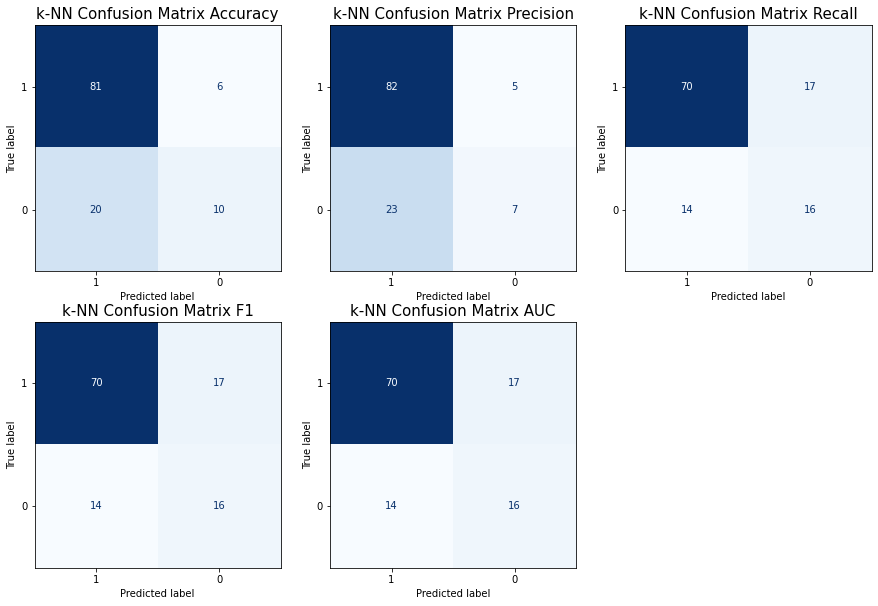

In [51]:
# confusion matrix for all models using different hyperparameter optimization 
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(15, 10))
plot_confusion_matrix(pipe_knn_acc, X_test, y_test, ax=axs[0,0],  labels=[1, 0], colorbar=False, cmap='Blues')
axs[0,0].set_title("k-NN Confusion Matrix Accuracy", size=15)

plot_confusion_matrix(pipe_knn_prec, X_test, y_test, ax=axs[0,1],  labels=[1, 0], colorbar=False, cmap='Blues')
axs[0,1].set_title("k-NN Confusion Matrix Precision", size=15)

plot_confusion_matrix(pipe_knn_rec, X_test, y_test, ax=axs[0,2],  labels=[1, 0], colorbar=False, cmap='Blues')
axs[0,2].set_title("k-NN Confusion Matrix Recall", size=15)

plot_confusion_matrix(pipe_knn_f1, X_test, y_test, ax=axs[1,0], labels=[1, 0], colorbar=False, cmap='Blues')
axs[1,0].set_title("k-NN Confusion Matrix F1", size=15)

plot_confusion_matrix(pipe_knn_auc, X_test, y_test, ax=axs[1,1],  labels=[1, 0], colorbar=False, cmap='Blues')
axs[1,1].set_title("k-NN Confusion Matrix AUC", size=15)

fig.delaxes(axs[1][2])
fig.savefig('kNN_Confusion_matrix.png', bbox_inches='tight')

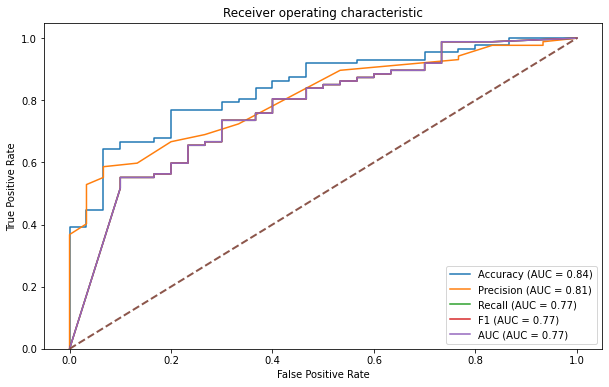

In [34]:
# ROC curve for each of the optimized model
f, ax = plt.subplots(1, 1, figsize=(10,6))
lw = 2
plot_roc_curve(pipe_knn_acc, X_test, y_test, ax=ax, name='Accuracy') 
plot_roc_curve(pipe_knn_prec, X_test, y_test, ax=ax, name='Precision') 
plot_roc_curve(pipe_knn_rec, X_test, y_test, ax=ax, name='Recall') 
plot_roc_curve(pipe_knn_f1, X_test, y_test, ax=ax, name='F1') 
plot_roc_curve(pipe_knn_auc, X_test, y_test, ax=ax, name='AUC') 

ax.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
f.savefig('kNN_ROC.png', bbox_inches='tight')

## Training and visualizing using RandomForest Classifier 

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
# combining PowerTransformer, PCA and RF in a single pipeline
pipe_rf = Pipeline([
    ('pt', PowerTransformer(method='box-cox')),
    ('pca', PCA()), 
    ('rf', RandomForestClassifier(class_weight={0:2.49, 1:1})) # balancing data with class_weight
])

# the parameter grid for RF pipeline with the specific chosen hyperparameters to be optimized 
param_grid = {
    'pca__n_components': range(2, 10),
    'rf__n_estimators': range(50, 351, 50),
    'rf__max_features': ['auto', 'sqrt', 'log2'],
    'rf__max_depth': range(10, 51, 5),
    'rf__criterion': ['gini', 'entropy']
}

In [37]:
# grid search on accuracy
pipe_rf_acc = GridSearchCV(estimator=pipe_rf, 
                  param_grid=param_grid, 
                  scoring=make_scorer(accuracy_score), 
                  refit=True,
                  cv=10,
                  n_jobs=-1)

# fitting the training data
pipe_rf_acc.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % pipe_rf_acc.best_score_)
print(pipe_rf_acc.best_params_)

# generating the predicted output using the above model
y_pred_rf_acc = pipe_rf_acc.predict(X_test)
target_names = ['not disease', 'disease']
print(classification_report(y_test, y_pred_rf_acc, target_names=target_names))

Best parameter (CV score=0.740):
{'pca__n_components': 5, 'rf__criterion': 'gini', 'rf__max_depth': 25, 'rf__max_features': 'log2', 'rf__n_estimators': 50}
              precision    recall  f1-score   support

 not disease       0.59      0.33      0.43        30
     disease       0.80      0.92      0.86        87

    accuracy                           0.77       117
   macro avg       0.69      0.63      0.64       117
weighted avg       0.75      0.77      0.75       117



In [38]:
# grid search on precision
pipe_rf_prec = GridSearchCV(estimator=pipe_rf, 
                  param_grid=param_grid, 
                  scoring=make_scorer(precision_score, average = 'macro'), 
                  refit=True,
                  cv=10,
                  n_jobs=-1)

# fitting the training data
pipe_rf_prec.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % pipe_rf_prec.best_score_)
print(pipe_rf_prec.best_params_)

# generating the predicted output using the above model
y_pred_rf_prec = pipe_rf_prec.predict(X_test)
target_names = ['not disease', 'disease']
print(classification_report(y_test, y_pred_rf_prec, target_names=target_names))

Best parameter (CV score=0.677):
{'pca__n_components': 5, 'rf__criterion': 'gini', 'rf__max_depth': 15, 'rf__max_features': 'auto', 'rf__n_estimators': 50}
              precision    recall  f1-score   support

 not disease       0.62      0.53      0.57        30
     disease       0.85      0.89      0.87        87

    accuracy                           0.79       117
   macro avg       0.73      0.71      0.72       117
weighted avg       0.79      0.79      0.79       117



In [39]:
# grid search on recall
pipe_rf_rec = GridSearchCV(estimator=pipe_rf, 
                  param_grid=param_grid, 
                  scoring=make_scorer(recall_score, average = 'macro'), 
                  refit=True,
                  cv=10,
                  n_jobs=-1)

# fitting the training data
pipe_rf_rec.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % pipe_rf_rec.best_score_)
print(pipe_rf_rec.best_params_)

# generating the predicted output using the above model
y_pred_rf_rec = pipe_rf_rec.predict(X_test)
target_names = ['not disease', 'disease']
print(classification_report(y_test, y_pred_rf_rec, target_names=target_names))

Best parameter (CV score=0.671):
{'pca__n_components': 2, 'rf__criterion': 'entropy', 'rf__max_depth': 10, 'rf__max_features': 'sqrt', 'rf__n_estimators': 50}
              precision    recall  f1-score   support

 not disease       0.52      0.73      0.61        30
     disease       0.89      0.77      0.83        87

    accuracy                           0.76       117
   macro avg       0.71      0.75      0.72       117
weighted avg       0.80      0.76      0.77       117



In [40]:
# grid search on F1 score
pipe_rf_f1 = GridSearchCV(estimator=pipe_rf, 
                  param_grid=param_grid, 
                  scoring=make_scorer(f1_score, average = 'macro'), 
                  refit=True,
                  cv=10,
                  n_jobs=-1)

# fitting the training data
pipe_rf_f1.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % pipe_rf_f1.best_score_)
print(pipe_rf_f1.best_params_)

# generating the predicted output using the above model
y_pred_rf_f1 = pipe_rf_f1.predict(X_test)
target_names = ['not disease', 'disease']
print(classification_report(y_test, y_pred_rf_f1, target_names=target_names))

Best parameter (CV score=0.663):
{'pca__n_components': 2, 'rf__criterion': 'entropy', 'rf__max_depth': 10, 'rf__max_features': 'auto', 'rf__n_estimators': 200}
              precision    recall  f1-score   support

 not disease       0.51      0.77      0.61        30
     disease       0.90      0.75      0.82        87

    accuracy                           0.75       117
   macro avg       0.71      0.76      0.72       117
weighted avg       0.80      0.75      0.77       117



In [41]:
# grid search on AUC
pipe_rf_auc = GridSearchCV(estimator=pipe_rf, 
                  param_grid=param_grid, 
                  scoring=make_scorer(roc_auc_score, average = 'macro'), 
                  refit=True,
                  cv=10,
                  n_jobs=-1)

# fitting the training data
pipe_rf_auc.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % pipe_rf_auc.best_score_)
print(pipe_rf_auc.best_params_)

# generating the predicted output using the above model
y_pred_rf_auc = pipe_rf_auc.predict(X_test)
target_names = ['not disease', 'disease']
print(classification_report(y_test, y_pred_rf_auc, target_names=target_names))

Best parameter (CV score=0.669):
{'pca__n_components': 2, 'rf__criterion': 'entropy', 'rf__max_depth': 10, 'rf__max_features': 'sqrt', 'rf__n_estimators': 350}
              precision    recall  f1-score   support

 not disease       0.47      0.80      0.59        30
     disease       0.91      0.69      0.78        87

    accuracy                           0.72       117
   macro avg       0.69      0.74      0.69       117
weighted avg       0.80      0.72      0.74       117



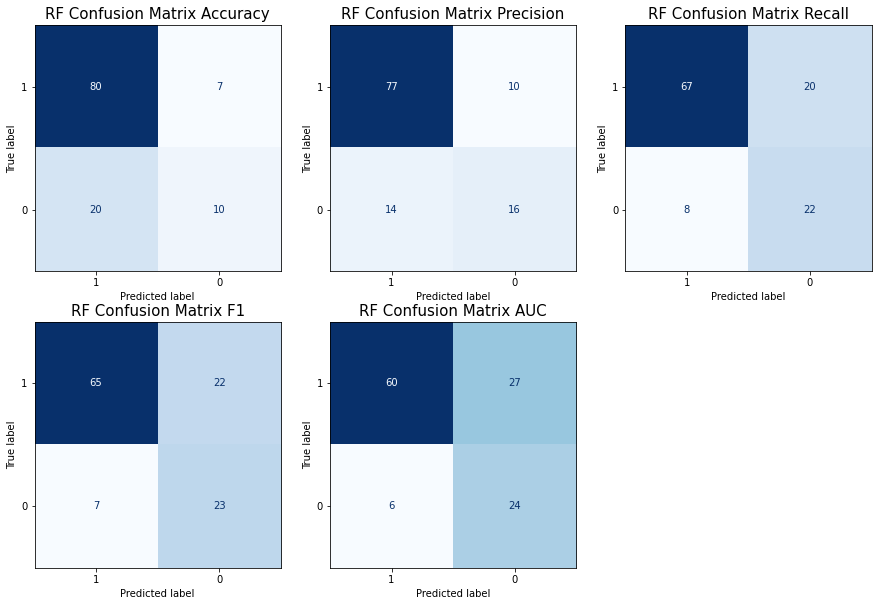

In [50]:
# confusion matrix for all models using different hyperparameter optimization 
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(15, 10))
plot_confusion_matrix(pipe_rf_acc, X_test, y_test, ax=axs[0,0], colorbar=False,  labels=[1, 0], cmap='Blues')
axs[0,0].set_title("RF Confusion Matrix Accuracy", size=15)

plot_confusion_matrix(pipe_rf_prec, X_test, y_test, ax=axs[0,1],  labels=[1, 0], colorbar=False, cmap='Blues')
axs[0,1].set_title("RF Confusion Matrix Precision", size=15)

plot_confusion_matrix(pipe_rf_rec, X_test, y_test, ax=axs[0,2], labels=[1, 0], colorbar=False, cmap='Blues')
axs[0,2].set_title("RF Confusion Matrix Recall", size=15)

plot_confusion_matrix(pipe_rf_f1, X_test, y_test, ax=axs[1,0],  labels=[1, 0], colorbar=False, cmap='Blues')
axs[1,0].set_title("RF Confusion Matrix F1", size=15)

plot_confusion_matrix(pipe_rf_auc, X_test, y_test, ax=axs[1,1],  labels=[1, 0], colorbar=False, cmap='Blues')
axs[1,1].set_title("RF Confusion Matrix AUC", size=15)

fig.delaxes(axs[1][2])
fig.savefig('RF_Confusion_matrix.png', bbox_inches='tight')

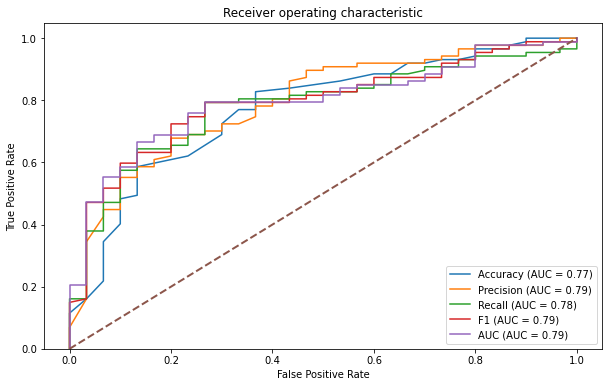

In [43]:
# ROC curve for each of the optimized model
f, ax = plt.subplots(1, 1, figsize=(10,6))
lw = 2
plot_roc_curve(pipe_rf_acc, X_test, y_test, ax=ax, name='Accuracy') 
plot_roc_curve(pipe_rf_prec, X_test, y_test, ax=ax, name='Precision') 
plot_roc_curve(pipe_rf_rec, X_test, y_test, ax=ax, name='Recall') 
plot_roc_curve(pipe_rf_f1, X_test, y_test, ax=ax, name='F1') 
plot_roc_curve(pipe_rf_auc, X_test, y_test, ax=ax, name='AUC') 

ax.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
f.savefig('RF_ROC.png', bbox_inches='tight')

## Sensitivity Analysis

Exploring the sensitivity of the model by modifying a single hyper-parameter

### k-NN

In [44]:
# classification accuracy using the best fit model paramters from the k-NN precision focussed model above
pipe_knn = Pipeline([
            ('pt', PowerTransformer(method='box-cox')),
            ('pca', PCA(n_components=7)), 
            ('knn', KNeighborsClassifier(n_neighbors=29, weights='distance', metric='euclidean'))])
pipe_knn.fit(X_train, y_train)

print (pipe_knn.score(X_test, y_test))

0.7777777777777778


In [45]:
# classification accuracy after modifying the hyperparamter k (n_neighbors) in the above model
pipe_knn = Pipeline([
            ('pt', PowerTransformer(method='box-cox')),
            ('pca', PCA(n_components=7)), 
            ('knn', KNeighborsClassifier(n_neighbors=25, weights='distance', metric='euclidean'))])
pipe_knn.fit(X_train, y_train)

print (pipe_knn.score(X_test, y_test))

0.7948717948717948


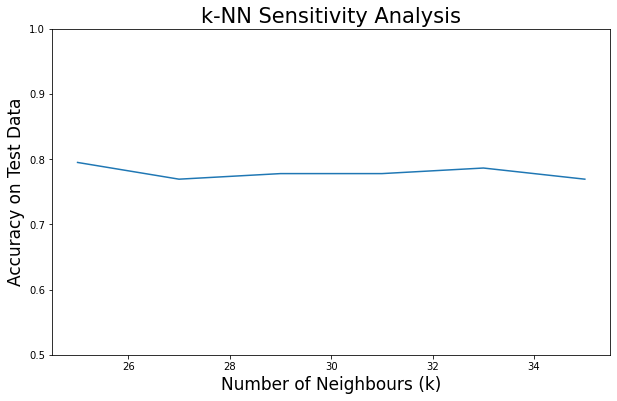

In [52]:
# plotting the classification accuracy on the test data for k in the range of 25 to 35
def plotvector(XTrain, yTrain, XTest, yTest, weights):
    results = []
    
    
    for n in range(25, 36, 2):
        pipe_knn = Pipeline([
            ('pt', PowerTransformer(method='box-cox')),
            ('pca', PCA(n_components=7)), 
            ('knn', KNeighborsClassifier(n_neighbors=n, weights='distance', metric='euclidean'))])
        pipe_knn = pipe_knn.fit(XTrain, yTrain)
        preds = pipe_knn.predict(XTest)
        accuracy = pipe_knn.score(XTest, yTest)
        results.append([n, accuracy])
 
    results = np.array(results)
    return(results)

pltvector1 = plotvector(X_train, y_train.ravel(), X_test, y_test.ravel(), weights="uniform")


fig, ax = plt.subplots(figsize=(10,6))
plt.plot(pltvector1[:,0], pltvector1[:,1])
plt.ylim(0.5, 1)
plt.title('k-NN Sensitivity Analysis', fontsize=21)
plt.xlabel('Number of Neighbours (k)', fontsize=17)
plt.ylabel('Accuracy on Test Data', fontsize=17)
plt.savefig('k-NN_sensitivity_analysis.png', bbox_inches='tight');

### Random Forest

In [55]:
# classification accuracy using the best fit model paramters from the Random Forest precision focussed model above
pipe_rf = Pipeline([
    ('pt', PowerTransformer(method='box-cox')),
    ('pca', PCA(n_components=5)), 
    ('rf', RandomForestClassifier(n_estimators=50, max_depth=15, max_features='auto', \
                                  criterion='gini', class_weight={0:2.49, 1:1}))])
pipe_rf.fit(X_train, y_train)

print (pipe_rf.score(X_test, y_test))

0.7521367521367521


In [56]:
# classification accuracy after modifying the hyperparamter n_estimators in the above model
pipe_rf = Pipeline([
    ('pt', PowerTransformer(method='box-cox')),
    ('pca', PCA(n_components=5)), 
    ('rf', RandomForestClassifier(n_estimators=60, max_depth=15, max_features='auto', \
                                  criterion='gini', class_weight={0:2.49, 1:1}))])
pipe_rf.fit(X_train, y_train)

print (pipe_rf.score(X_test, y_test))

0.8034188034188035


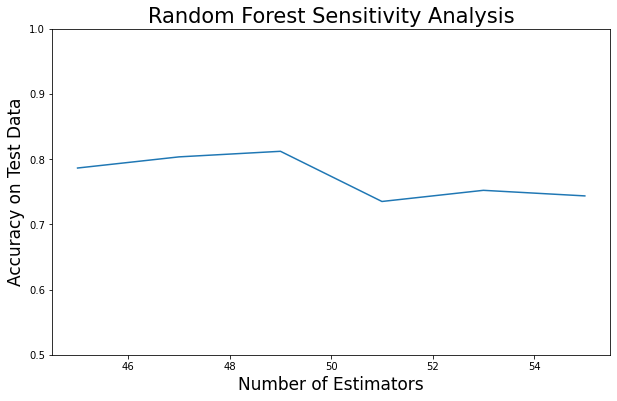

In [57]:
# plotting the classification accuracy on the test data for n_estimators in the range of 45 to 55
def plotvector(XTrain, yTrain, XTest, yTest):
    results = []
    
    
    for n in range(45, 56, 2):
        pipe_rf = Pipeline([
                            ('pt', PowerTransformer(method='box-cox')),
                            ('pca', PCA(n_components=5)), 
                            ('rf', RandomForestClassifier(n_estimators=60, max_depth=15, max_features='auto', \
                                  criterion='gini', class_weight={0:2.49, 1:1}))])
        pipe_rf = pipe_rf.fit(XTrain, yTrain)
        preds = pipe_rf.predict(XTest)
        accuracy = pipe_rf.score(XTest, yTest)
        results.append([n, accuracy])
 
    results = np.array(results)
    return(results)

pltvector1 = plotvector(X_train, y_train.ravel(), X_test, y_test.ravel())


fig, ax = plt.subplots(figsize=(10,6))
plt.plot(pltvector1[:,0], pltvector1[:,1])
plt.ylim(0.5, 1)
plt.title('Random Forest Sensitivity Analysis', fontsize=21)
plt.xlabel('Number of Estimators', fontsize=17)
plt.ylabel('Accuracy on Test Data', fontsize=17)
plt.savefig('RF_sensitivity_analysis.png', bbox_inches='tight');